<a href="https://colab.research.google.com/github/VaibhavKot/Predictive-Modeling-for-Concrete-Carbonation-Depth/blob/main/BTech_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
num_rows = df.shape[0]

print(f"The dataset has {num_rows} rows.")

# Check the number of columns in the dataset
num_columns = df.shape[1]

print(f"The dataset has {num_columns} columns.")

The dataset has 764 rows.
The dataset has 30 columns.


In [ ]:
df.head()

ï»¿Clinquer (kg/m3 )  Binder content (kg/m3 )  Clinker (percentage)  \
0                 260.0                    260.0                  90.9   
1                 300.0                    300.0                  90.9   
2                 340.0                    340.0                  90.9   
3                 530.0                    580.7                  83.0   
4                 260.0                    260.0                  54.3   

   Practically inert additions (percentage)  \
0                                       5.0   
1                                       5.0   
2                                       5.0   
3                                       4.6   
4                                       3.0   

   Latent hydraulic additions (percentage)  Pozzolanic additions (percentage)  \
0                                      0.0                                0.0   
1                                      0.0                                0.0   
2                                      0.0                                0.0   
3                                      0.0                                8.7   
4                                      0.0                               39.3   

   Minority constituents (percentage) (e.g. calcium sulfate)  \
0                                                4.1           
1                                                4.1           
2                                                4.1           
3                                                3.7           
4                                                3.4           

   water content (l/m3)  Water/cement ratio  Water/binder ratio  ...  \
0                 169.3            0.651154                0.65  ...   
1                 150.7            0.502333                0.50  ...   
2                 153.3            0.450882                0.45  ...   
3                 177.3            0.334528                0.30  ...   
4                 169.3            0.651154                0.65  ...   

   Slump (mm)  Relative humidity (%).1  Temperature (ÂºC).1   CO2  \
0          70                     79.8                 17.0  0.05   
1         130                     79.8                 17.0  0.05   
2         180                     79.8                 17.0  0.05   
3         120                     79.8                 17.0  0.05   
4         150                     79.8                 17.0  0.05   

   Exposure class  Protection from the action of rain  Exposure to salts  \
0               2                                  -1                  1   
1               2                                  -1                  1   
2               2                                  -1                  1   
3               2                                  -1                  1   
4               2                                  -1                  1   

   Time of exposure (years)  Carbonation coefficient - (k) - mm/ano-1/2  \
0                       1.0                                         7.5   
1                       1.0                                         5.0   
2                       1.0                                         4.7   
3                       1.0                                         1.8   
4                       1.0                                        11.6   

   Carbonation depth (mm)  
0                     7.5  
1                     5.0  
2                     4.7  
3                     1.8  
4                    11.6  

[5 rows x 30 columns]

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Display the structure of the dataset
print(df.info())

# Summary statistics
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ï»¿Clinquer (kg/m3 )                                       764 non-null    float64
 1   Binder content (kg/m3 )                                    764 non-null    float64
 2   Clinker (percentage)                                       764 non-null    float64
 3   Practically inert additions (percentage)                   764 non-null    float64
 4   Latent hydraulic additions (percentage)                    764 non-null    float64
 5   Pozzolanic additions (percentage)                          764 non-null    float64
 6   Minority constituents (percentage) (e.g. calcium sulfate)  764 non-null    float64
 7   water content (l/m3)                                       764 non-null    float64
 8   Water/ceme

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Create a pair plot
sns.pairplot(df)
plt.show()


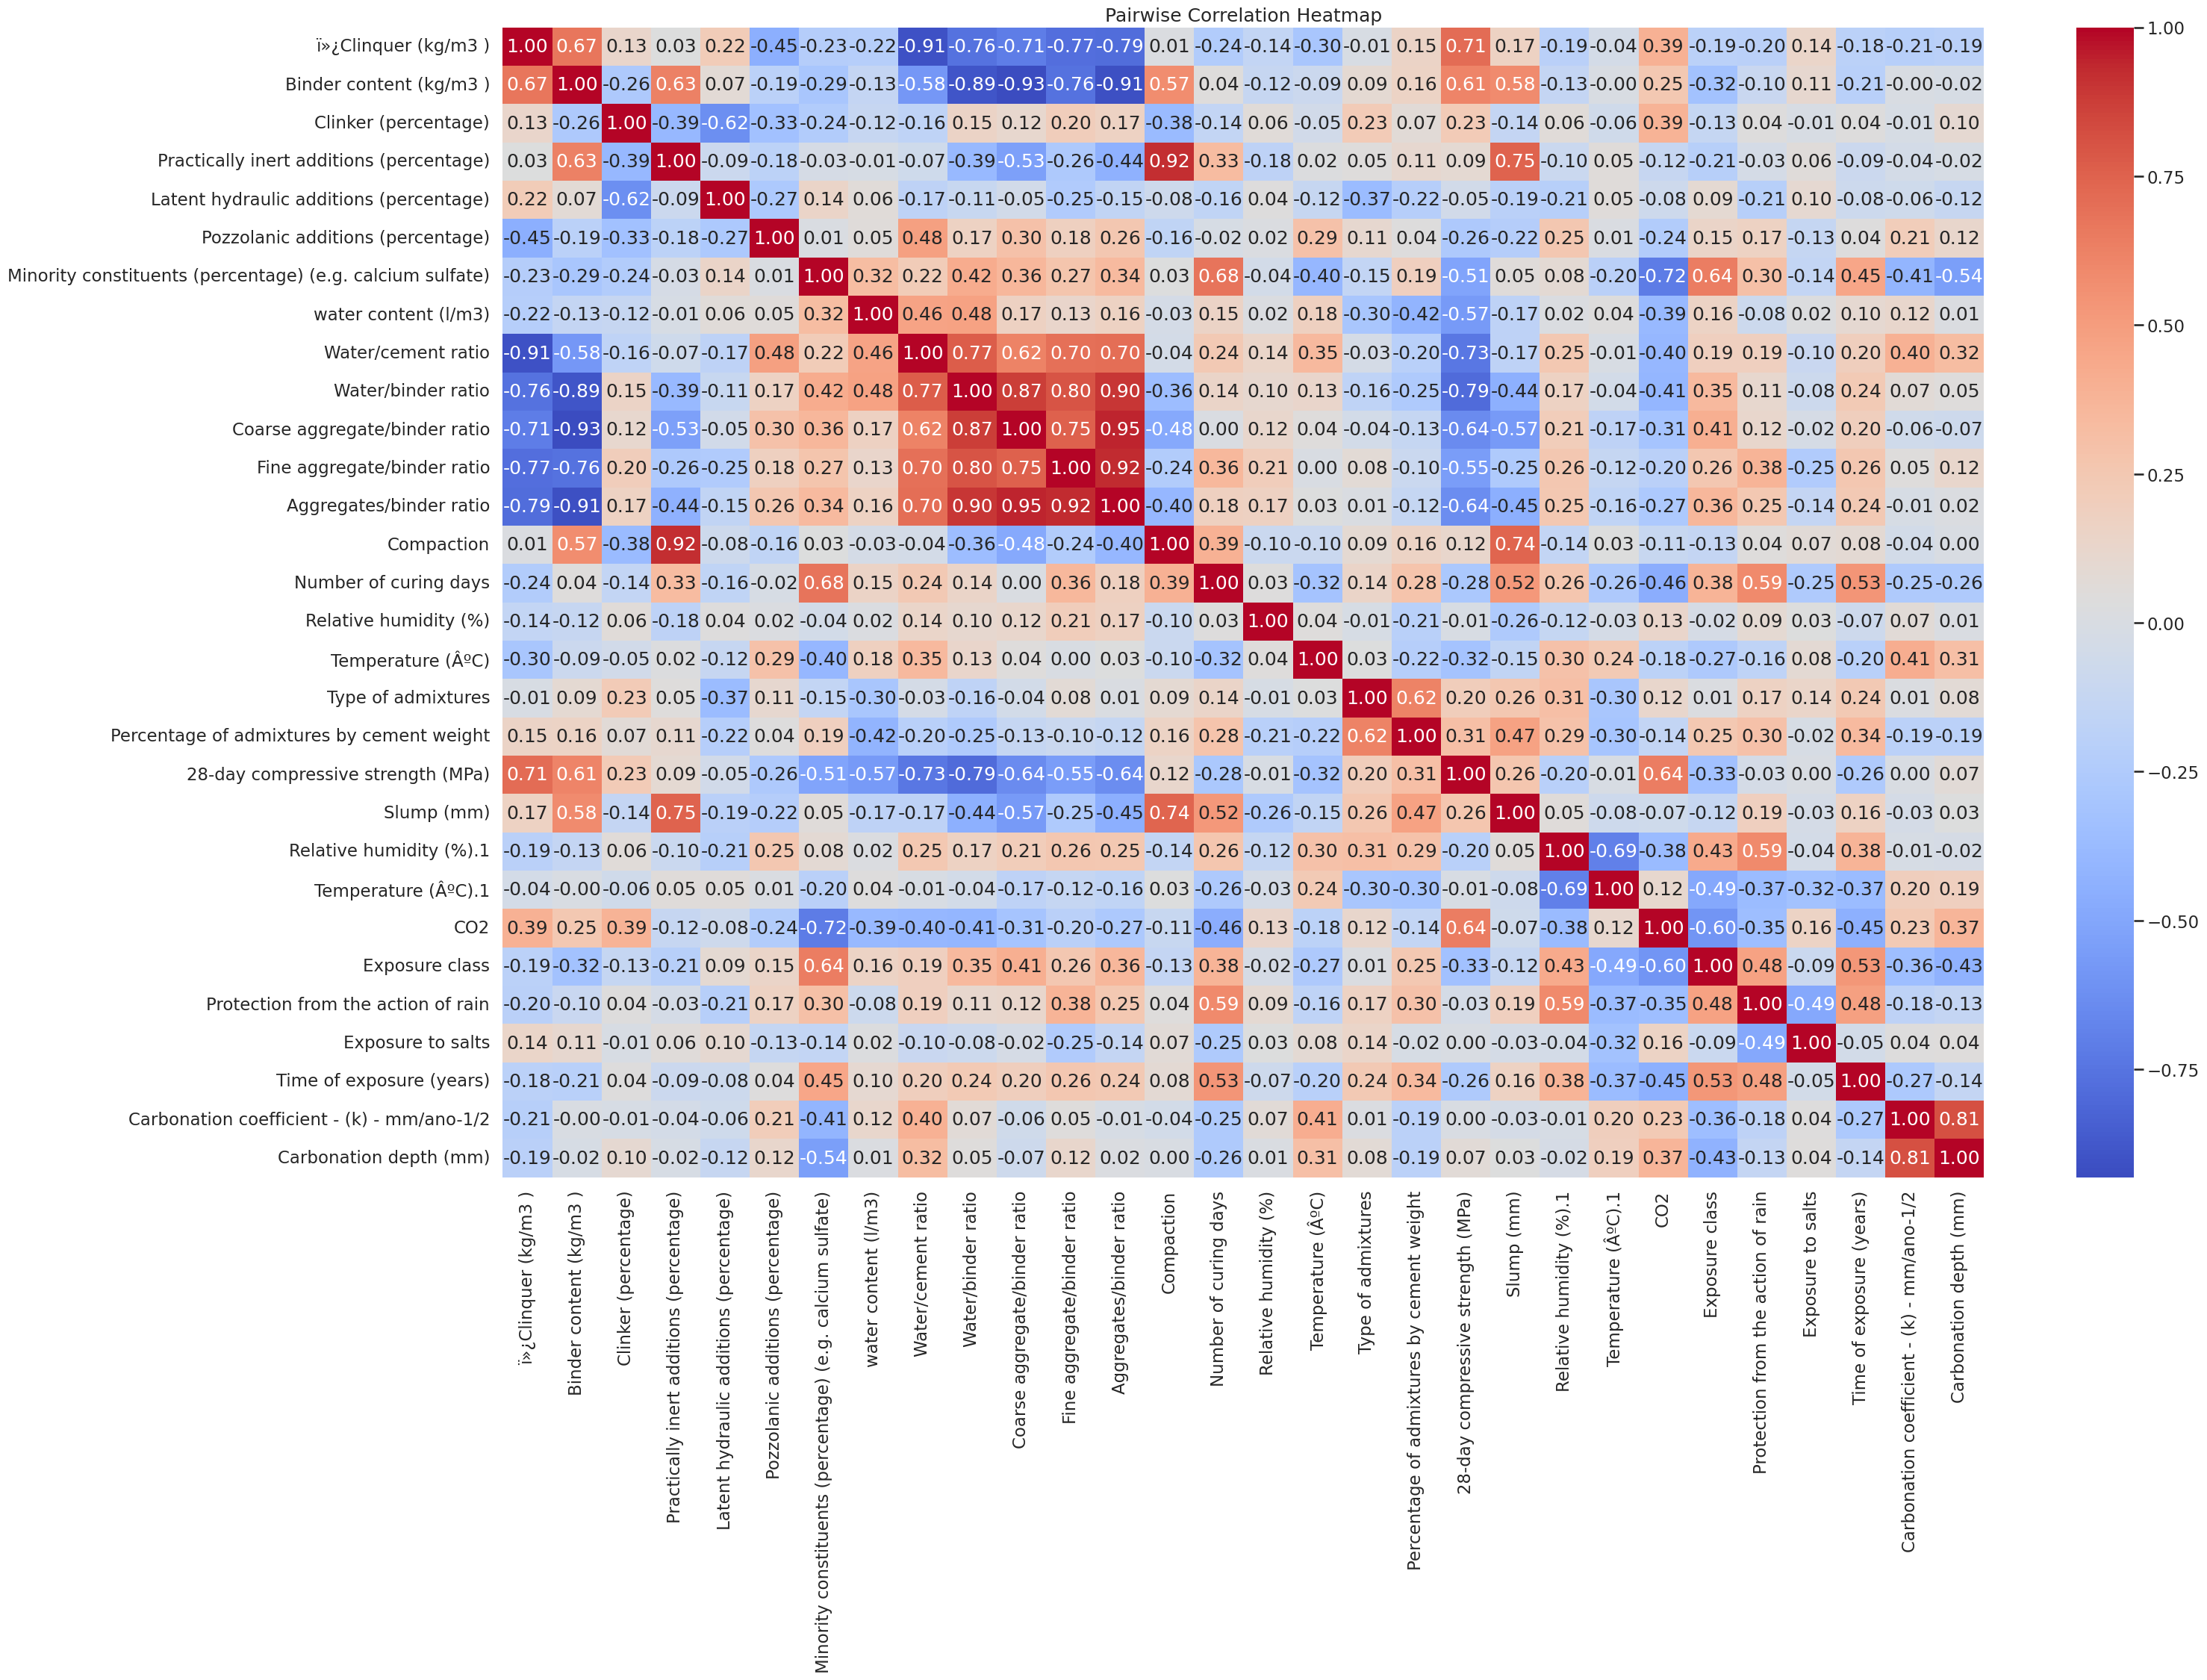

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')




# Pairwise correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Gradient Boosting Regressor model
# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(
    loss='squared_error',  # Corrected parameter for least squares regression
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42

)

# Train the Gradient Boosting Regressor model on the training set
gbr_model.fit(X_train, y_train)

# Make predictions on the testing set
gbr_y_pred = gbr_model.predict(X_test)

# Evaluate the model performance using R2 score
gbr_r2_score = r2_score(y_test, gbr_y_pred)

# Print the Gradient Boosting Regressor details and R2 score
print("Gradient Boosting Regressor Details:")
print("Number of Estimators:", gbr_model.n_estimators)
print("Learning Rate:", gbr_model.learning_rate)
print("Maximum Depth:", gbr_model.max_depth)
print("R2 Score:", gbr_r2_score)


Gradient Boosting Regressor Details:
Number of Estimators: 100
Learning Rate: 0.1
Maximum Depth: 3
R2 Score: 0.9038938586504989


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']

# Train the Gradient Boosting Regressor model on the entire dataset
gbr_model = GradientBoostingRegressor(
    loss='squared_error',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X, y)

# Get user inputs for prediction
user_inputs = {}
for column in X.columns:
    user_input = input(f"Enter the value for {column}: ")
    user_inputs[column] = [float(user_input)]

# Create a DataFrame from user inputs
user_df = pd.DataFrame(user_inputs)

# Make predictions using the trained model
prediction = gbr_model.predict(user_df)

# Print the prediction
print(f"Predicted Carbonation Depth: {prediction[0]}")


Enter the value for ï»¿Clinquer (kg/m3 ): 34
Enter the value for Binder content (kg/m3 ): 34
Enter the value for Clinker (percentage): 34
Enter the value for Practically inert additions (percentage): 34
Enter the value for Latent hydraulic additions (percentage): 67
Enter the value for Pozzolanic additions (percentage): 34
Enter the value for Minority constituents (percentage) (e.g. calcium sulfate): 23
Enter the value for water content (l/m3): 67
Enter the value for Water/cement ratio: 23
Enter the value for Water/binder ratio: 34
Enter the value for Coarse aggregate/binder ratio: 45
Enter the value for Fine aggregate/binder ratio: 12
Enter the value for Aggregates/binder ratio: 32
Enter the value for Compaction: 23
Enter the value for Number of curing days: 34
Enter the value for Relative humidity (%): 23
Enter the value for Temperature (ÂºC): 23
Enter the value for Type of admixtures: 12
Enter the value for Percentage of admixtures by cement weight: 23
Enter the value for 28-day com

In [ ]:
# Import necessary libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Decision Tree Regressor model
# Create a Decision Tree Regressor model
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(
    criterion='squared_error',   # Explicitly use 'squared_error' for the criterion parameter
    max_depth=None,              # Maximum depth of the tree (None means nodes are expanded until they contain less than min_samples_split samples)
    min_samples_split=2,         # The minimum number of samples required to split an internal node
    random_state=42              # Seed for reproducibility
)


# Train the Decision Tree Regressor model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model performance using R2 score
dt_r2_score = r2_score(y_test, dt_y_pred)

# Print the Decision Tree Regressor details and R2 score
print("Decision Tree Regressor Details:")
print("Criterion:", dt_model.criterion)
print("Maximum Depth:", dt_model.max_depth)
print("Min Samples Split:", dt_model.min_samples_split)
print("R2 Score:", dt_r2_score)


Decision Tree Regressor Details:
Criterion: squared_error
Maximum Depth: None
Min Samples Split: 2
R2 Score: 0.8621612731698022


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into features and target variable
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Train the Decision Tree Regressor model on the entire dataset
dt_model.fit(X, y)

# Get user inputs for prediction
user_inputs = {}
for column in X.columns:
    user_input = input(f"Enter the value for {column}: ")
    user_inputs[column] = [float(user_input)]

# Create a DataFrame from user inputs
user_df = pd.DataFrame(user_inputs)

# Make predictions using the trained model
prediction = dt_model.predict(user_df)

# Print the prediction
print(f"Predicted Carbonation Depth: {prediction[0]}")

1225234



Enter the value for ï»¿Clinquer (kg/m3 ): 23
Enter the value for Binder content (kg/m3 ): 23
Enter the value for Clinker (percentage): 34
Enter the value for Practically inert additions (percentage): 23
Enter the value for Latent hydraulic additions (percentage): 12
Enter the value for Pozzolanic additions (percentage): 43
Enter the value for Minority constituents (percentage) (e.g. calcium sulfate): 23
Enter the value for water content (l/m3): 43
Enter the value for Water/cement ratio: 23
Enter the value for Water/binder ratio: 34
Enter the value for Coarse aggregate/binder ratio: 43
Enter the value for Fine aggregate/binder ratio: 12
Enter the value for Aggregates/binder ratio: 34
Enter the value for Compaction: 34
Enter the value for Number of curing days: 43
Enter the value for Relative humidity (%): 23
Enter the value for Temperature (ÂºC): 4
Enter the value for Type of admixtures: 54
Enter the value for Percentage of admixtures by cement weight: 23
Enter the value for 28-day comp

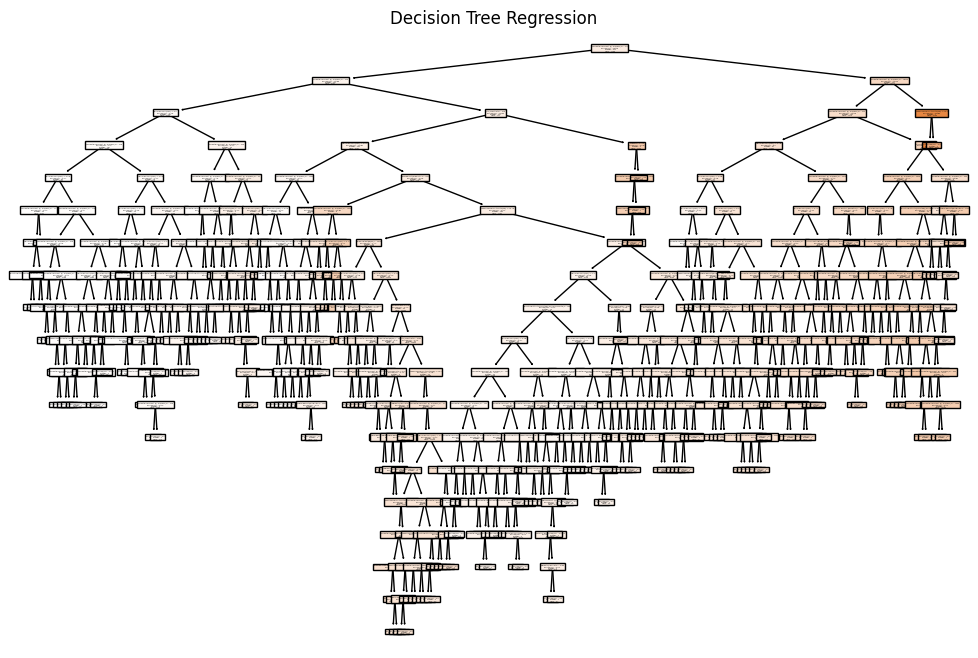

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.title('Decision Tree Regression')
plt.show()


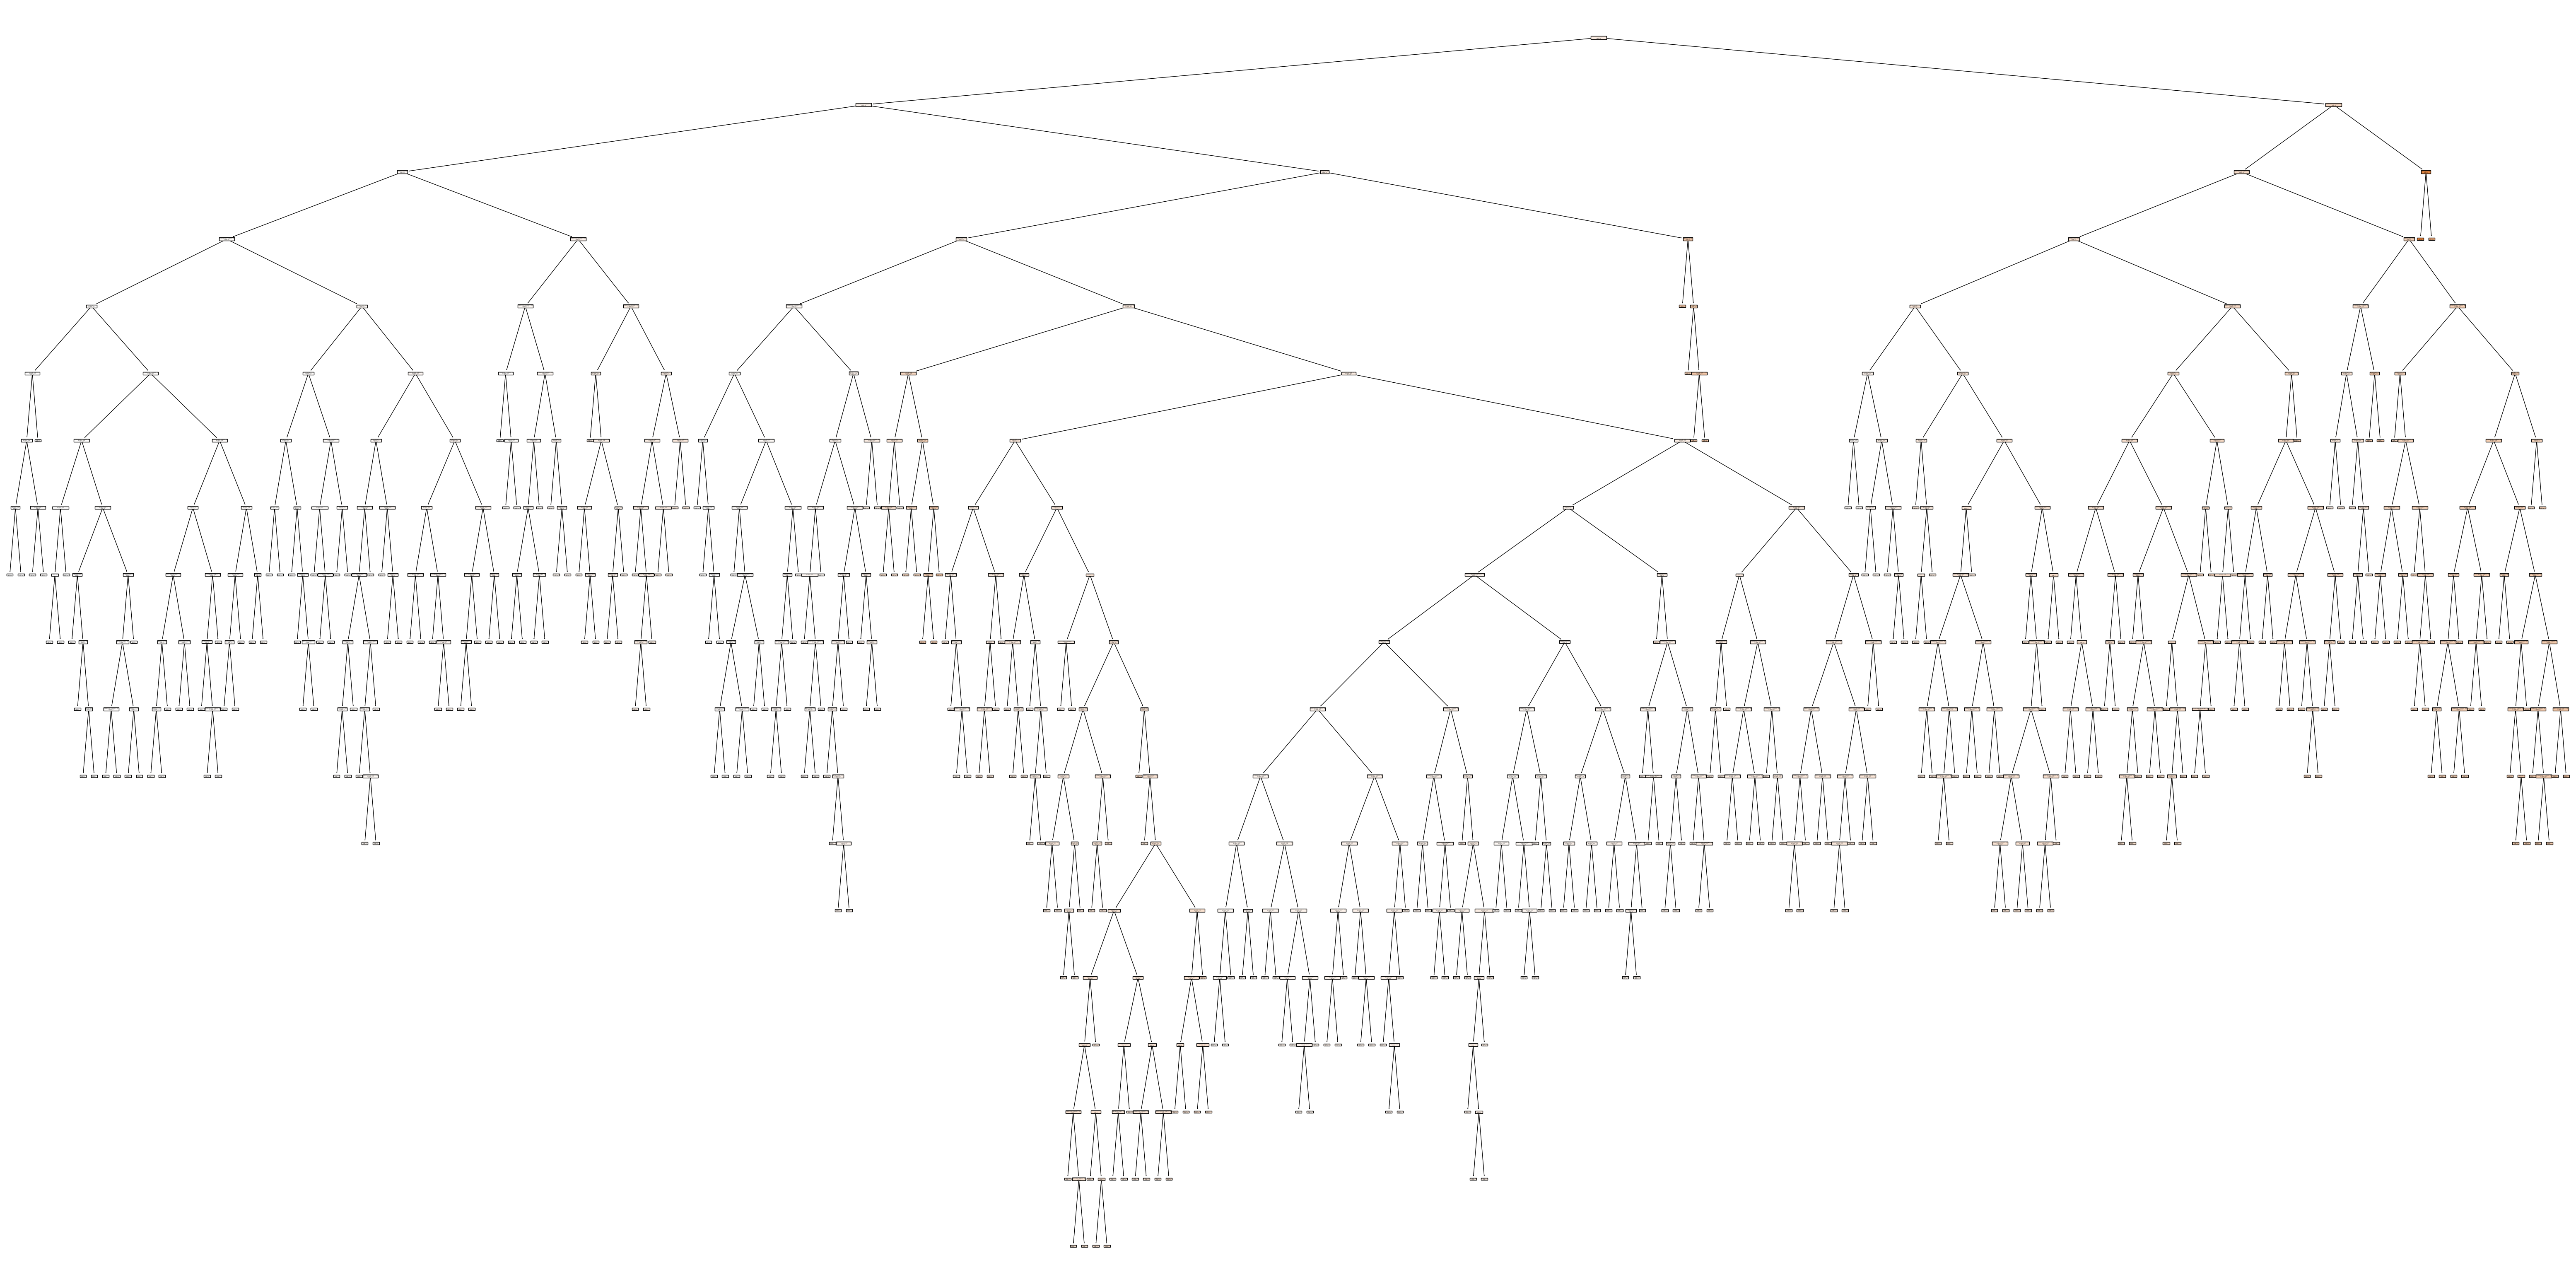

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Specify the index of the tree you want to plot (e.g., the first tree)
tree_index = 0

# Plot the specified Decision Tree from the DecisionTreeRegressor model
plt.figure(figsize=(80, 40))
plot_tree(dt_model, feature_names=X_train.columns, filled=True)
plt.show()




In [ ]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
 # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNeighbors Regressor model
knn_model = KNeighborsRegressor(
    n_neighbors=5,      # Number of neighbors to use for predictions (adjustable parameter)
    weights='uniform',  # Weight function used in predictions. 'uniform' assigns equal weight to all neighbors.
    algorithm='auto'     # Algorithm used to compute the nearest neighbors (auto selects the most appropriate algorithm)
)

# Train the KNeighbors Regressor model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model performance using R2 score
knn_r2_score = r2_score(y_test, knn_y_pred)

# Print the KNeighbors Regressor details and R2 score
print("KNeighbors Regressor Details:")
print("Number of Neighbors:", knn_model.n_neighbors)
print("Weights:", knn_model.weights)
print("Algorithm:", knn_model.algorithm)
print("R2 Score:", knn_r2_score)


KNeighbors Regressor Details:
Number of Neighbors: 5
Weights: uniform
Algorithm: auto
R2 Score: 0.7292742039802775


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into features and target variable
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']

# Create a KNeighbors Regressor model
knn_model = KNeighborsRegressor(
    n_neighbors=5,      # Number of neighbors to use for predictions (adjustable parameter)
    weights='uniform',  # Weight function used in predictions. 'uniform' assigns equal weight to all neighbors.
    algorithm='auto'     # Algorithm used to compute the nearest neighbors (auto selects the most appropriate algorithm)
)

# Train the KNeighbors Regressor model on the entire dataset
knn_model.fit(X, y)

# Get user inputs for prediction
user_inputs = {}
for column in X.columns:
    user_input = input(f"Enter the value for {column}: ")
    user_inputs[column] = [float(user_input)]

# Create a DataFrame from user inputs
user_df = pd.DataFrame(user_inputs)

# Make predictions using the trained model
prediction = knn_model.predict(user_df)

# Print the prediction
print(f"Predicted Carbonation Depth: {prediction[0]}")
22

Enter the value for ï»¿Clinquer (kg/m3 ): 32
Enter the value for Binder content (kg/m3 ): 34
Enter the value for Clinker (percentage): 43
Enter the value for Practically inert additions (percentage): 23
Enter the value for Latent hydraulic additions (percentage): 43
Enter the value for Pozzolanic additions (percentage): 45
Enter the value for Minority constituents (percentage) (e.g. calcium sulfate): 23
Enter the value for water content (l/m3): 43
Enter the value for Water/cement ratio: 234
Enter the value for Water/binder ratio: 4
Enter the value for Coarse aggregate/binder ratio: 23
Enter the value for Fine aggregate/binder ratio: 23
Enter the value for Aggregates/binder ratio: 43
Enter the value for Compaction: 12
Enter the value for Number of curing days: 43
Enter the value for Relative humidity (%): 23
Enter the value for Temperature (ÂºC): 34
Enter the value for Type of admixtures: 23
Enter the value for Percentage of admixtures by cement weight: 34
Enter the value for 28-day com

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model performance using R2 score
lr_r2_score = r2_score(y_test, lr_y_pred)

# Print the Linear Regression details and R2 score
print("Linear Regression Details:")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)
print("R2 Score:", lr_r2_score)


Linear Regression Details:
Intercept: 33.353728074411364
Coefficients: [ 5.99382565e-03  5.93416774e-03  9.03566212e-02  1.09626791e-01
  1.39733179e-01  1.16758042e-01 -2.19649757e+00 -5.18818841e-02
  1.59373705e+00  2.58811496e+01  9.44849525e-01  1.92399316e-01
 -1.08041075e+00 -1.65781957e+00  1.51035086e-01 -1.44800640e-02
 -2.92249645e+00  8.39193065e-01 -1.28360277e+00  3.17533131e-03
  1.22582853e-02  1.56532606e-01  3.33016606e-01 -6.43772621e-02
 -7.67067872e-01 -2.48265154e-01  1.25336995e+00  1.03767987e+00
  1.26240514e-01]
R2 Score: 0.7188670065638468


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Split the data into features and target variable
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model on the entire dataset
lr_model.fit(X, y)

# Get user inputs for prediction
user_inputs = {}
for column in X.columns:
    user_input = input(f"Enter the value for {column}: ")
    user_inputs[column] = [float(user_input)]

# Create a DataFrame from user inputs
user_df = pd.DataFrame(user_inputs)

# Make predictions using the trained model
prediction = lr_model.predict(user_df)

# Print the prediction
print(f"Predicted Carbonation Depth: {prediction[0]}")
884675


Enter the value for ï»¿Clinquer (kg/m3 ): 34
Enter the value for Binder content (kg/m3 ): 34
Enter the value for Clinker (percentage): 45
Enter the value for Practically inert additions (percentage): 23
Enter the value for Latent hydraulic additions (percentage): 65
Enter the value for Pozzolanic additions (percentage): 54
Enter the value for Minority constituents (percentage) (e.g. calcium sulfate): 64
Enter the value for water content (l/m3): 33
Enter the value for Water/cement ratio: 534
Enter the value for Water/binder ratio: 654
Enter the value for Coarse aggregate/binder ratio: 32
Enter the value for Fine aggregate/binder ratio: 54
Enter the value for Aggregates/binder ratio: 54
Enter the value for Compaction: 32
Enter the value for Number of curing days: 65
Enter the value for Relative humidity (%): 65
Enter the value for Temperature (ÂºC): 43
Enter the value for Type of admixtures: 54
Enter the value for Percentage of admixtures by cement weight: 54
Enter the value for 28-day c

884675

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonation1.csv',encoding='unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Create a Linear Regression model
lr_model = LinearRegression()

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Create a KNeighbors Regressor model
knn_model = KNeighborsRegressor()

# Train the models on the training set
gbr_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
gbr_y_pred = gbr_model.predict(X_test)
lr_y_pred = lr_model.predict(X_test)
dt_y_pred = dt_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model performance
gbr_r2_score = r2_score(y_test, gbr_y_pred)
lr_r2_score = r2_score(y_test, lr_y_pred)
dt_r2_score = r2_score(y_test, dt_y_pred)
knn_r2_score = r2_score(y_test, knn_y_pred)

# Print the R2 scores
print('Gradient Boosting Regressor R2 score:', gbr_r2_score)
print('Linear Regression R2 score:', lr_r2_score)
print('Decision Tree Regressor R2 score:', dt_r2_score)
print('KNeighbors Regressor R2 score:', knn_r2_score)


Gradient Boosting Regressor R2 score: 0.9045860060616544
Linear Regression R2 score: 0.7188670065638468
Decision Tree Regressor R2 score: 0.8559341969751667
KNeighbors Regressor R2 score: 0.7292742039802775


In [ ]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the CSV file
df = pd.read_csv('carbonaton1.csv',encoding= 'unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Gradient Boosting Regressor model with early stopping
gbr_model = GradientBoostingRegressor(n_iter_no_change=10)

# Train the model on the training set
gbr_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
gbr_y_train_pred = gbr_model.predict(X_train)
gbr_y_test_pred = gbr_model.predict(X_test)

# Evaluate the model performance on the training and testing sets
gbr_r2_train_score = r2_score(y_train, gbr_y_train_pred)
gbr_r2_test_score = r2_score(y_test, gbr_y_test_pred)

# Print the R2 scores
print('Gradient Boosting Regressor with early stopping R2 score on training set:', gbr_r2_train_score)
print('Gradient Boosting Regressor with early stopping R2 score on testing set:', gbr_r2_test_score)




Gradient Boosting Regressor with early stopping R2 score on training set: 0.9842858187074386
Gradient Boosting Regressor with early stopping R2 score on testing set: 0.8885905078766771


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the CSV file
df = pd.read_csv('carbonaton1.csv',encoding= 'unicode_escape')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Train the model on the training set
gbr_model.fit(X_train, y_train)

# Evaluate the model on the validation set
gbr_val_y_pred = gbr_model.predict(X_val)
gbr_val_r2_score = r2_score(y_val, gbr_val_y_pred)

# Print the R2 score on the validation set
print('Gradient Boosting Regressor R2 score on validation set:', gbr_val_r2_score)

# If the model is overfitting the training set, tune the hyperparameters of the model and repeat the training and evaluation process.

# Once the model is no longer overfitting the training set, evaluate the model on the testing set.


Gradient Boosting Regressor R2 score on validation set: 0.9045391554060895


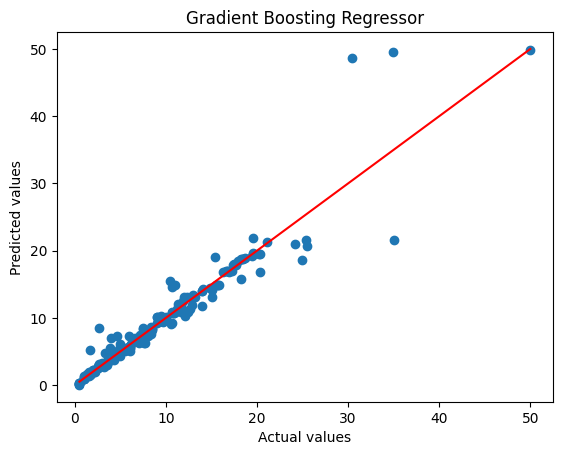

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('carbonaton1.csv',encoding='unicode_escape ')

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Create a scatter plot of the predictions versus the actual values
plt.scatter(y_test, y_pred)

# Add a trend line to the scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')

# Add a title and axis labels
plt.title('Gradient Boosting Regressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Show the plot
plt.show()


In [ ]:
# Convert the predicted values to the original scale
y_pred_original = y_pred * 100

# Print the predicted values in the original scale
print(y_pred_original)

[1.49049249e+03 9.54721379e+02 2.55354131e+02 2.15853111e+03
 1.88512262e+03 9.40161475e+02 2.11730440e+02 1.71181146e+02
 6.84165729e+02 2.12658184e+03 1.83919040e+03 5.59588179e+02
 6.05419923e+02 1.20914635e+03 5.59457429e+02 7.24551931e+02
 1.94798094e+03 5.50313672e+02 2.81038574e+02 8.84612594e+01
 5.37458793e+02 1.82361790e+02 1.54978140e+00 3.13711478e+02
 1.12456475e+03 1.69062634e+03 1.68647726e+03 1.14683671e+02
 4.54758685e+02 1.19348618e+03 6.75723451e+02 2.99717034e+02
 1.97437875e+01 1.00665920e+03 2.90483470e+02 2.18101533e+03
 5.02514502e+02 1.67147702e+02 2.07526605e+03 1.92639975e+02
 1.99446289e+02 4.86213386e+03 4.80795969e+02 1.08435952e+03
 7.63678123e+02 1.08157643e+03 5.50313672e+02 1.35033017e+02
 1.47108013e+03 5.40670457e+02 9.34336931e+01 1.12026376e+03
 1.30574588e+03 1.69062634e+03 1.56418060e+01 3.26166467e+02
 3.72363785e+02 1.17858238e+03 9.05498462e+02 5.25247646e+02
 1.99144837e+02 3.33143366e+01 7.24316590e+02 1.94798094e+03
 1.05830094e+02 3.438950

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Ask the user for the CSV file path
csv_path = input("Enter the path to the CSV file: ")

# Load the CSV file
df = pd.read_csv(csv_path, encoding='unicode_escape')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a list of models
models = [
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('KNeighbors Regressor', KNeighborsRegressor())
]

# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} R2 score: {r2}')

    # Optional: Plot predicted vs actual values for each model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted Values')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the CSV file
df = pd.read_csv('carbonaton1.csv', encoding='unicode_escape')

# Split the data into training, validation, and testing sets
X = df.drop('Carbonation depth (mm)', axis=1)
y = df['Carbonation depth (mm)']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into validation and test sets (50% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Train the model on the training set
gbr_model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = gbr_model.predict(X_train)
y_valid_pred = gbr_model.predict(X_valid)
y_test_pred = gbr_model.predict(X_test)

# Calculate R2 scores for each dataset
train_r2_score = r2_score(y_train, y_train_pred)
valid_r2_score = r2_score(y_valid, y_valid_pred)
test_r2_score = r2_score(y_test, y_test_pred)

# Print the R2 scores
print('Training R2 score:', train_r2_score)
print('Validation R2 score:', valid_r2_score)
print('Test R2 score:', test_r2_score)


Training R2 score: 0.9962636351578665
Validation R2 score: 0.8719785657154465
Test R2 score: 0.9150636108053


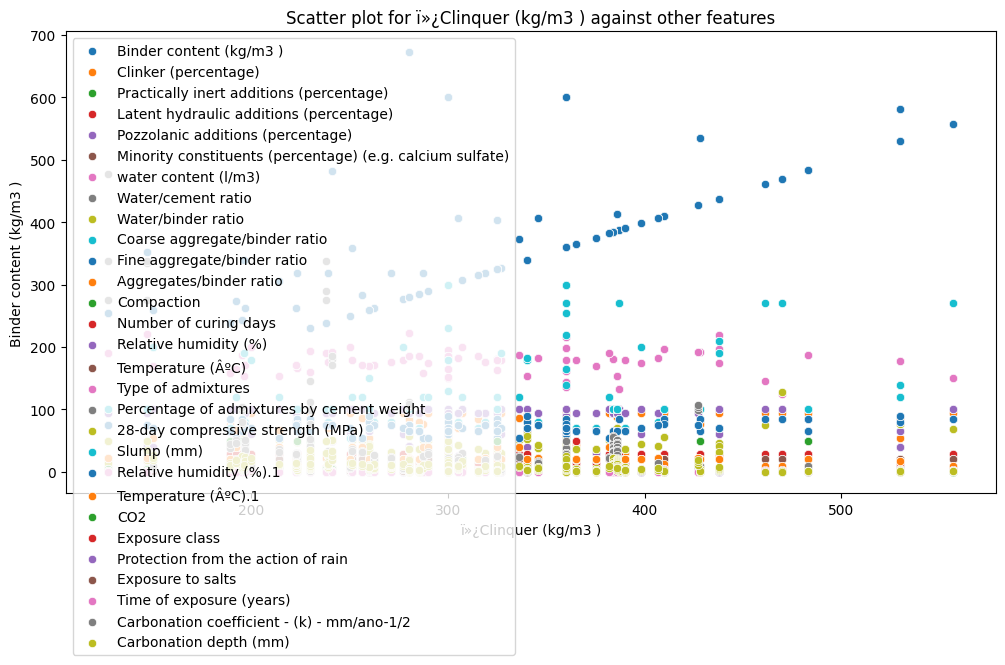

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Choose the first feature for the scatter plot
first_feature = df.columns[0]

# Create a scatter plot for the first feature against all other features
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
for column in df.columns:
    if column != first_feature:
        sns.scatterplot(x=first_feature, y=column, data=df, label=column)

plt.title(f'Scatter plot for {first_feature} against other features')
plt.legend()
plt.show()


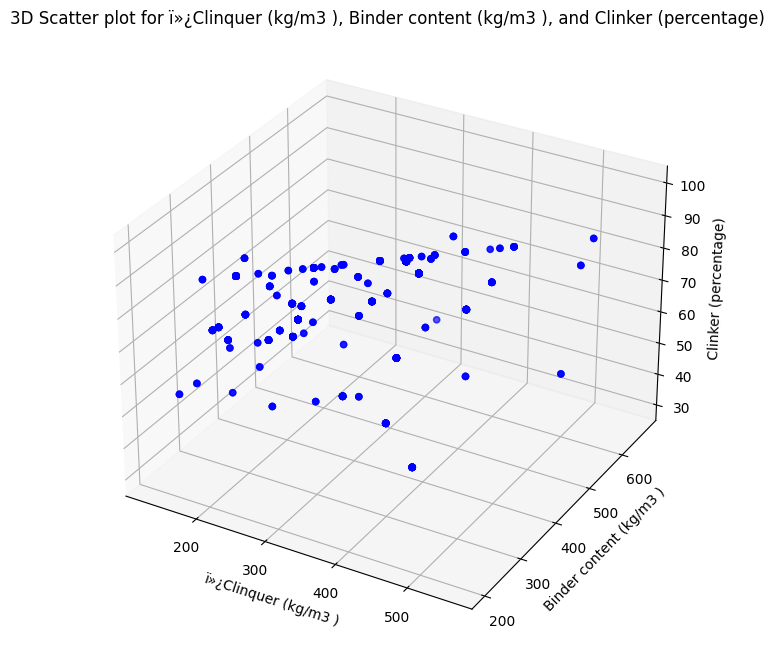

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Choose the first feature and two other features for the 3D scatter plot
first_feature = df.columns[0]
second_feature = df.columns[1]
third_feature = df.columns[2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[first_feature], df[second_feature], df[third_feature], c='blue', marker='o')

ax.set_xlabel(first_feature)
ax.set_ylabel(second_feature)
ax.set_zlabel(third_feature)

plt.title(f'3D Scatter plot for {first_feature}, {second_feature}, and {third_feature}')
plt.show()


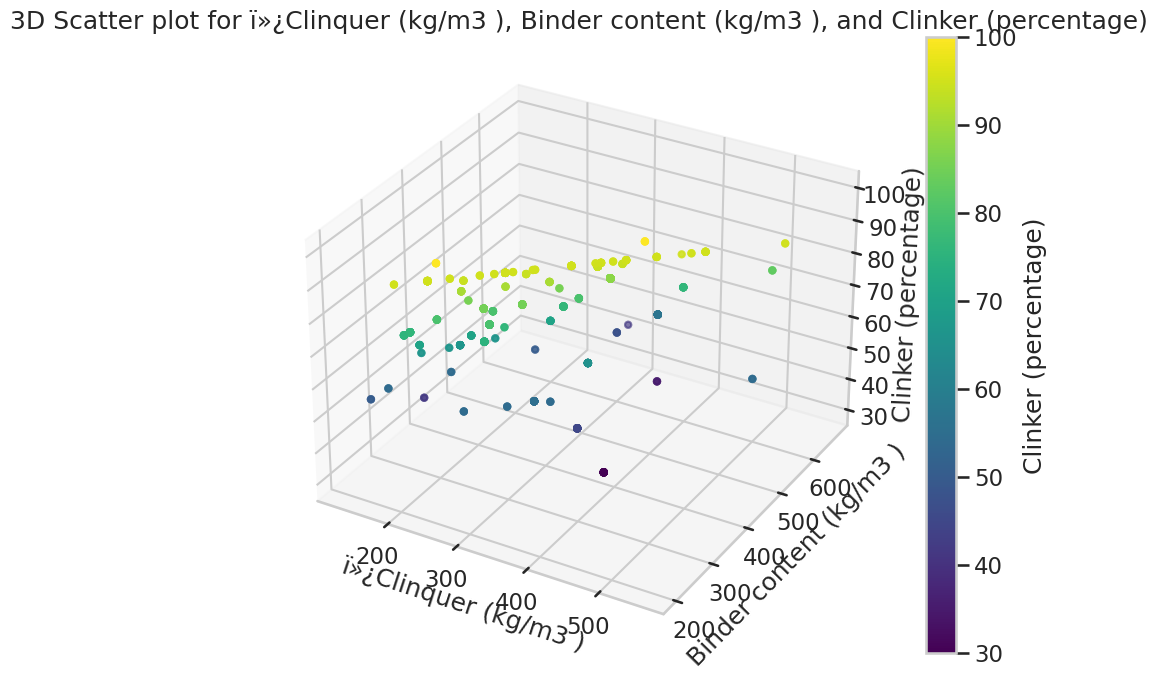

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Choose the first feature and two other features for the 3D scatter plot
first_feature = df.columns[0]
second_feature = df.columns[1]
third_feature = df.columns[2]

# Set the Seaborn theme to 'plotly' for 3D plots
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_context("talk")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df[first_feature], df[second_feature], df[third_feature], c=df[third_feature], cmap='viridis', marker='o')

ax.set_xlabel(first_feature)
ax.set_ylabel(second_feature)
ax.set_zlabel(third_feature)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(third_feature)

plt.title(f'3D Scatter plot for {first_feature}, {second_feature}, and {third_feature}')
plt.show()



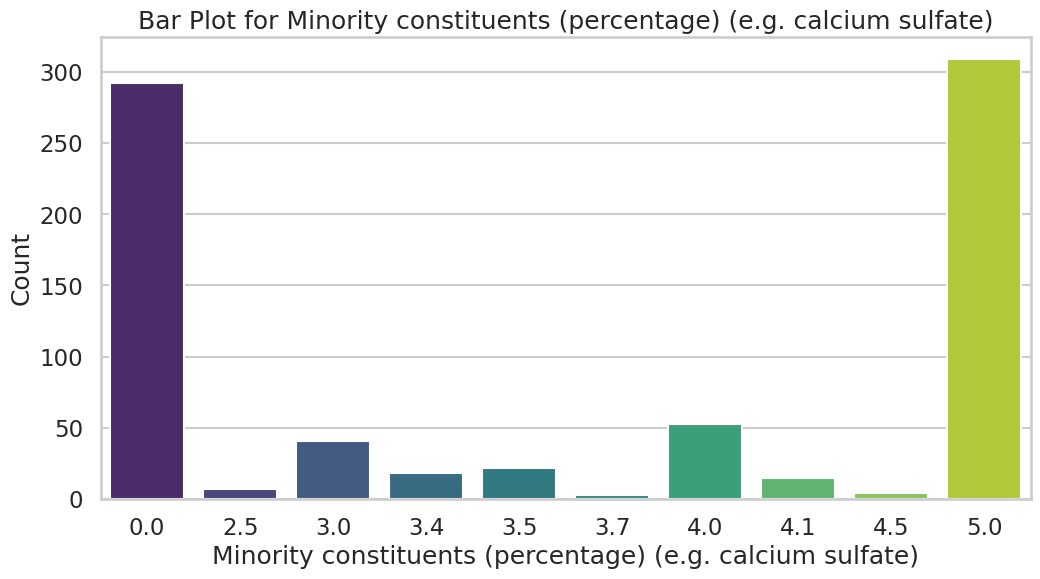

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('carbonation1.csv', encoding='unicode_escape')

# Choose a categorical feature for the bar plot
categorical_feature = df.columns[6]  # Adjust the column index based on your dataset

# Create a colorful bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x=categorical_feature, data=df, palette='viridis')

# Set labels and title
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.title(f'Bar Plot for {categorical_feature}')

plt.show()
